In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import numpy as np
from io import BytesIO
import datetime
import random

In [17]:
def getcorpus(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words



def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 100))

#basic cloud
def cloud(text,imgurl,save, color):
    response1 = requests.get(imgurl)
    img = Image.open(BytesIO(response1.content))
    mask = np.array(img)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=7000, mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
#advanced cloud either local or url image
def cloudtweek(text, imgloc, imgurl,maxsize , maxwords, save, title, color):
    if imgloc == "local":
        mask = np.array(Image.open(imgurl))
    else:
        response1 = requests.get(imgurl)
        img = Image.open(BytesIO(response1.content))
        mask = np.array(img)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=maxwords,max_font_size=maxsize,  mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    plt.title(title)
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    
    plt.show()
    
#basic cloud local image     
def cloud_local(text,img,save, color):
    mask = np.array(Image.open(img))
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=7000, mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
  
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


In [3]:
HP1 = getcorpus("https://github.com/formcept/whiteboard/blob/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt")
HP1 =HP1.replace('Page     Harry Potter and the Philosophers Stone   J K  Rowling', '') 


stopwords = set(STOPWORDS)

In [4]:
HP2 = getcorpus("http://www.pauladaunt.com/books/Children's/Harry_Potter1-4-1/J.%20K.%20Rowling%20-%20Harry%20Potter%202%20-%20The%20Chamber%20Of%20Secrets.txt")


In [7]:
HP3 = getcorpus("http://www.pauladaunt.com/books/Children's/Harry_Potter1-4/J.%20K.%20Rowling%20-%20Harry%20Potter%203%20-%20Prisoner%20of%20Azkaban.txt")

In [8]:
HP4 = getcorpus("https://cdn.preterhuman.net/texts/literature/books_by_title/N%20-%20S/Rowlings%20Goblet%20of%20Fire.txt")

In [9]:
HP5 = getcorpus("https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt")

In [10]:
HP6 = getcorpus("https://github.com/bobdeng/owlreader/blob/master/ERead/assets/books/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt")

In [12]:
HP7 = getcorpus("https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt")

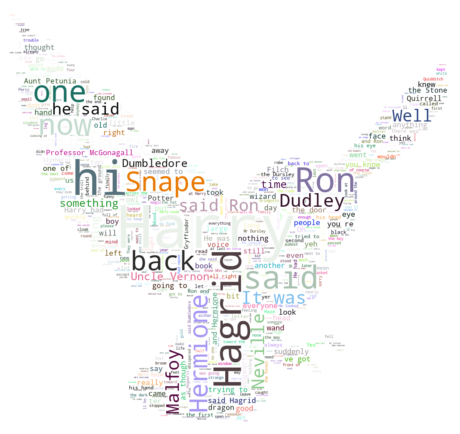

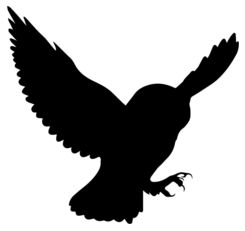

In [5]:
cloud_local(HP1, "slack-imgs edit.jpg", "yes", "random")

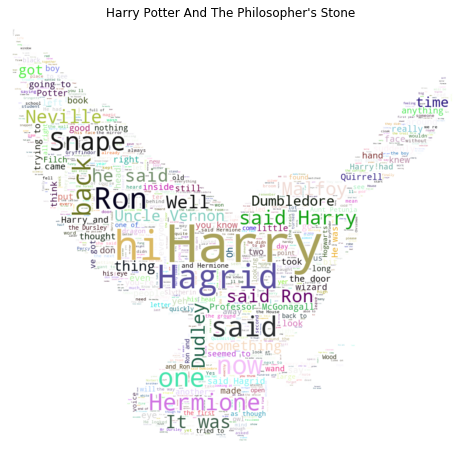

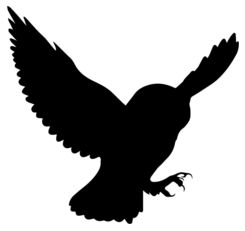

In [18]:
cloudtweek(HP1, "local", "slack-imgs edit.jpg",120, 70000, "yes", "Harry Potter And The Philosopher's Stone", "random" )


